# Problem 1

In [2]:
import numpy as np
import scipy.io as io
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

hw3_1 = io.loadmat("hw3.mat")['hw3_1']
hw3_2_1 = io.loadmat("hw3.mat")['hw3_2_1']
hw3_2_2 = io.loadmat("hw3.mat")['hw3_2_2']


In [3]:
X = hw3_1
N = X.shape[1] # 2×100
print(N)

# Label Assignment
labels = np.zeros(N, dtype=int)
labels[:50] = 1
labels[50:] = 2


100


In [4]:
def compute_params(X, labels):
    # Get samples for each group
    X1 = X[:, labels == 1]
    X2 = X[:, labels == 2]

    # caclulate means and covariances
    mu1 = np.mean(X1, axis=1, keepdims=True)
    mu2 = np.mean(X2, axis=1, keepdims=True)
    cov1 = np.cov(X1)
    cov2 = np.cov(X2)
    return mu1, cov1, mu2, cov2
    
mu1, cov1, mu2, cov2 = compute_params(X, labels)

In [5]:
def gaussian_likelihood(x, mean, cov):
    d = len(x)
    return (1 / np.sqrt((2*np.pi)**d * det(cov))) * np.exp(-0.5 * (x-mean).T @ inv(cov) @ (x-mean))

In [6]:
def reassign_labels(X, mu1, cov1, mu2, cov2):
    N = X.shape[1]
    new_labels = np.zeros(N, dtype=int)
    for i in range(N):
        x = X[:, i:i+1]
        L1 = gaussian_likelihood(x, mu1, cov1)
        L2 = gaussian_likelihood(x, mu2, cov2)
        
        # Reassign labels based on the larger likelihood
        if L1 > L2:
            new_labels[i] = 1
        else:
            new_labels[i] = 2

    return new_labels

labels = reassign_labels(X, mu1, cov1, mu2, cov2)


In [7]:
# Computer parameters and labels again for the current labels 5 times
for iteration in range(5):
    mu1, cov1, mu2, cov2 = compute_params(X, labels)
    labels = reassign_labels(X, mu1, cov1, mu2, cov2)

In [8]:
print("Mu 1:\n", mu1)
print("Sigma 1:\n", cov1)

print("Mu 2:\n", mu2)
print("Sigma 2:\n", cov2)

rho = np.mean(labels == 1)
print("p:", rho)


Mu 1:
 [[-0.00927247]
 [-0.09062225]]
Sigma 1:
 [[0.92841029 0.23141262]
 [0.23141262 0.95069319]]
Mu 2:
 [[ 4.28515937]
 [-3.27960628]]
Sigma 2:
 [[2.99200168 0.08011813]
 [0.08011813 7.88324674]]
p: 0.71


Mu 1:
 [[-0.00927247]
 [-0.09062225]]


Sigma 1:
 [[0.92841029 0.23141262]
 [0.23141262 0.95069319]]


Mu 2:
 [[ 4.28515937]
 [-3.27960628]]


Sigma 2:
 [[2.99200168 0.08011813]
 [0.08011813 7.88324674]]
p: 0.71

# Problem 2 

## Part 1

In [9]:
# Parzen parameters
n_samples = hw3_2_1.shape[1]
h1 = 2.0
h = h1 / np.sqrt(n_samples)
norm_const = 1.0 / (2*np.pi * h*h)

xs = np.arange(-4, 8.1, 0.1)
ys = np.arange(-4, 8.1, 0.1)

P1 = np.zeros((len(xs), len(ys)))
P2 = np.zeros((len(xs), len(ys)))

In [10]:
# Compute Parzen for each point
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        X = np.array([[x],[y]])  # 2x1
        
        # Class 1
        diffs1 = X - hw3_2_1
        u1 = diffs1 / h
        k1 = np.exp(-0.5*(u1[0]**2 + u1[1]**2))
        P1[i,j] = norm_const * np.mean(k1)
        
        # Class 2
        diffs2 = X - hw3_2_2
        u2 = diffs2 / h
        k2 = np.exp(-0.5*(u2[0]**2 + u2[1]**2))
        P2[i,j] = norm_const * np.mean(k2)

x_test = np.array([[1],[-2]])

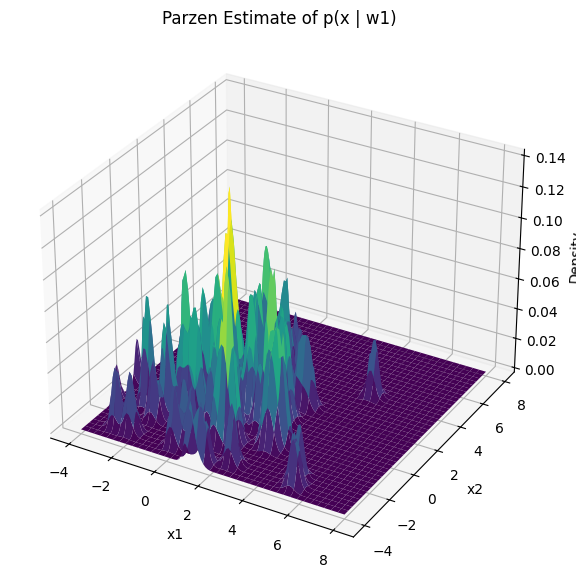

In [11]:
# Create meshgrid
Xg, Yg = np.meshgrid(xs, ys)
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, P1.T, cmap='viridis')

ax.set_title("Parzen Estimate of p(x | w1)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Density")
plt.show()

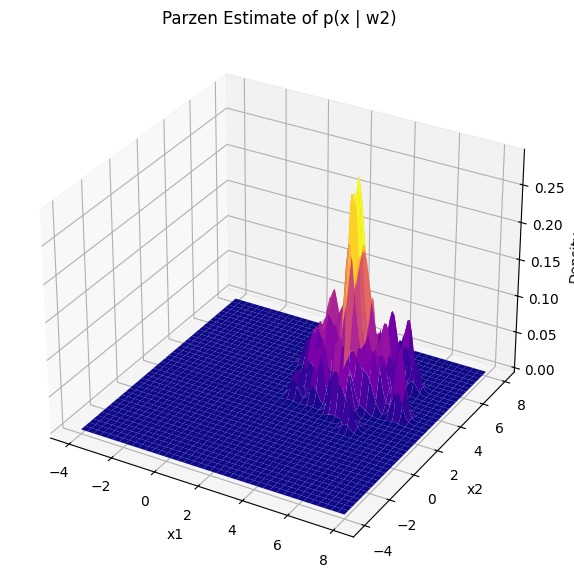

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Xg, Yg, P2.T, cmap='plasma')

ax.set_title("Parzen Estimate of p(x | w2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Density")
plt.show()

In [13]:
def parzen_point(x, w):
    diffs = x - w
    u = diffs / h
    k = np.exp(-0.5*(u[0]**2 + u[1]**2))
    return norm_const * np.mean(k)

In [14]:
p1_test = parzen_point(x_test, hw3_2_1)
p2_test = parzen_point(x_test, hw3_2_2)

In [15]:
print(p1_test)
print(p2_test)

if p1_test > p2_test:
    print("Belongs to class w1")
else:
    print("Belongs to class w2")


0.012295818993957312
2.811903709825917e-119
Belongs to class w1


0.012295818993957312

2.811903709825917e-119

Belongs to class w1

## Part 2

In [16]:
x = np.array([[1],[-2]]) # Test Data
sigma2 = 0.2**2

In [17]:
# Net Activation
net1 = x.T @ hw3_2_1
net2 = x.T @ hw3_2_2

# Activation Functions
g1 = np.sum(np.exp((net1 - 1) / sigma2))
g2 = np.sum(np.exp((net2 - 1) / sigma2))

In [18]:
print(g1)
print(g2)

if g1 > g2:
    print("Class 1")
else:
    print("Class 2")


6.569719746719733e+118
499788099337494.3
Class 1


6.569719746719733e+118

499788099337494.3

Class 1